# EDSA 2022 Classification Hackathon - South African Language Identification

**Overview**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Honour Code

I **Emmanuel, Nnaemeka**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.


# Problem Statement

With the divers official languages in South Africa, 11, precisely, a system is needed to effectively taken in texts in any of this languages and identify accurateky which language it's in; this is to aid general communal interaction in the country.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#five>5. Modeling</a> <br>
<a> 5A. Testing runAllModels function on the count vectorized dataset. </a> <br>
<a> 5B. Testing runAllModels function on the tfidf vectorized dataset. </a> <br>
<a> 5C. maing predictions </a> <br>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

<a id="one"></a>
## 1. Importing Packages 

In [1]:

#import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


<a id = "two"></a>
## 2. Loading Data

**Load** **original** **data**

In [2]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [3]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


**Create a copy of data for further analysis and grouping by distinct language**

In [4]:
train_copy = df_train.copy()
test_copy = df_test.copy()

<a id = "three"></a>
## 3. Exploratory Data Analysis

**Now that we've successfully loaded our data, let's see what we're working with; let's check for data types on train data**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


**Checking for presence of missing values in the dataset**

In [6]:
df_train.isna().sum()

lang_id    0
text       0
dtype: int64

> There are no missing values in the training set.

**Let's check for unique values of lang_id**

In [7]:
unique_vals = df_train['lang_id'].unique()
count_of_unique_vals = df_train['lang_id'].nunique()

print(unique_vals)
print("\nThere are ", count_of_unique_vals, "different languages in the dataset")

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']

There are  11 different languages in the dataset


**Let's visualize the how these languages occur in the data frame by plot the values**

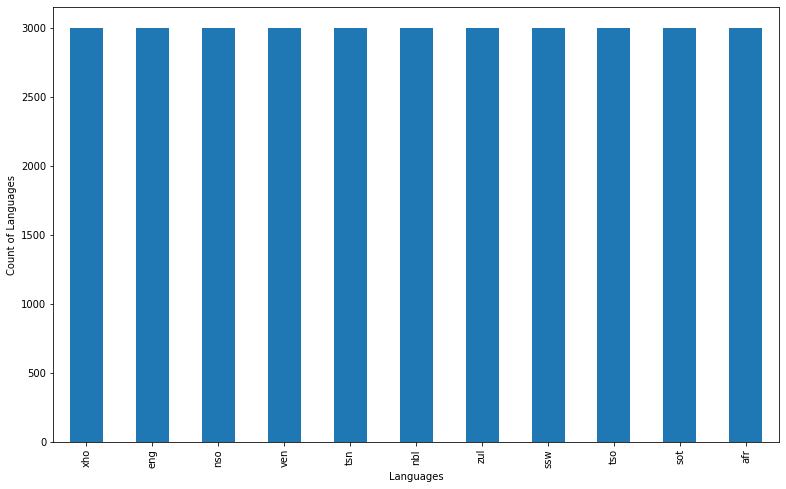

In [8]:
fig, ax = plt.subplots(figsize=(13, 8))
df_train['lang_id'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Languages')
ax.set_ylabel('Count of Languages')
plt.show()


In [9]:
{lang:df_train[df_train['lang_id'] == lang]['lang_id'].count() for lang in unique_vals}

{'xho': 3000,
 'eng': 3000,
 'nso': 3000,
 'ven': 3000,
 'tsn': 3000,
 'nbl': 3000,
 'zul': 3000,
 'ssw': 3000,
 'tso': 3000,
 'sot': 3000,
 'afr': 3000}

> There are 3000 entries for each of the different type of south african languages contained in the dataset.

**Using word clouds, let's have a look at what the words in each language type looks like**

1. Group the data into a list of 11 dataframes of the unique languages
2. Visualize, using word cloud

In [10]:
column_list = [train_copy[train_copy['lang_id'] == j] for j in unique_vals]
column_list

[      lang_id                                               text
 0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
 1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
 28        xho  langa eli xesha nesizathu salo zingasinika ama...
 43        xho  abafaki-zicelo abadla umhlala-phantsi ncedani ...
 59        xho  intsilelo ligcisa ukthobela ukuziphatha okumis...
 ...       ...                                                ...
 32972     xho  akukho nzala iya kuhlawulwa kwintlawulo eyenzi...
 32974     xho  bhede bhota zizi bhota dlamini bexhawulana tyh...
 32978     xho  eli candelo alibabopheleli abaphathi abakwizik...
 32979     xho  ndivumele nkosikazi somlomo nosihlalo ngokupha...
 32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...
 
 [3000 rows x 2 columns],
       lang_id                                               text
 2         eng  the province of kwazulu-natal department of tr...
 23        eng  if the post of accounting office

Text(0.5, 1.0, 'AFR')

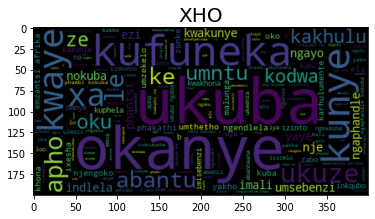

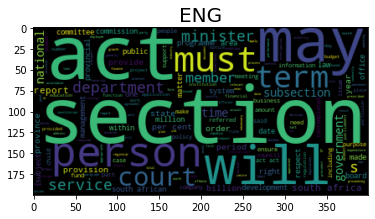

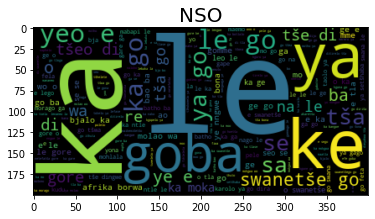

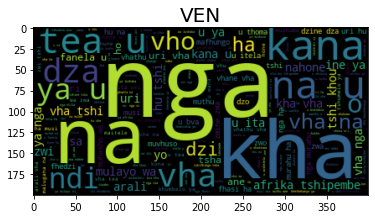

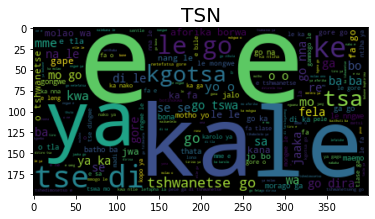

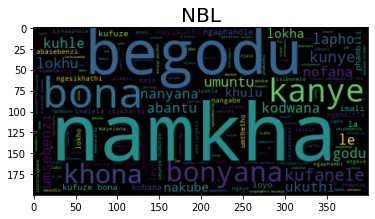

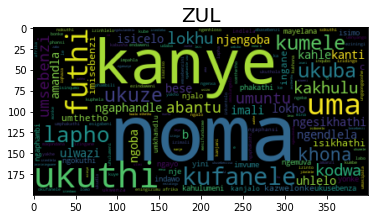

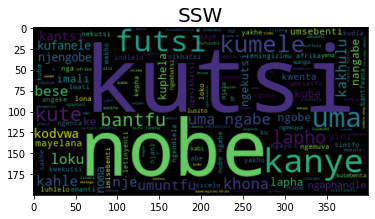

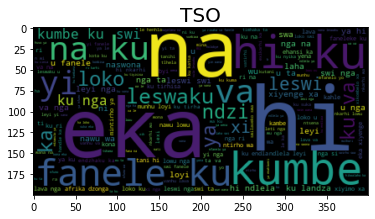

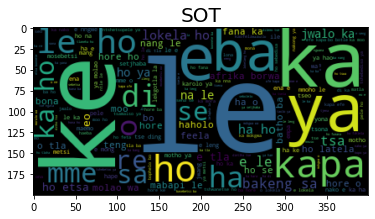

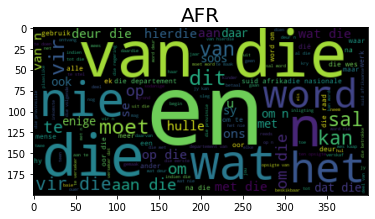

In [11]:
#xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr'
#--VISUALIZATION
xho = train_copy[(train_copy['lang_id'] == 'xho')]
eng = train_copy[(train_copy['lang_id'] == 'eng')]
nso = train_copy[(train_copy['lang_id'] == 'nso')]
ven = train_copy[(train_copy['lang_id'] == 'ven')]
tsn = train_copy[(train_copy['lang_id'] == 'tsn')]
nbl = train_copy[(train_copy['lang_id'] == 'nbl')]
zul = train_copy[(train_copy['lang_id'] == 'zul')]
ssw = train_copy[(train_copy['lang_id'] == 'ssw')]
tso = train_copy[(train_copy['lang_id'] == 'tso')]
sot = train_copy[(train_copy['lang_id'] == 'sot')]
afr = train_copy[(train_copy['lang_id'] == 'afr')]

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(xho.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('XHO',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(eng.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('ENG',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(nso.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('NSO',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(ven.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('VEN',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(tsn.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('TSN',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(nbl.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('NBL',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(zul.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('ZUL',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(ssw.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('SSW',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(tso.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('TSO',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(sot.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('SOT',fontsize=20)

plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(afr.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('AFR',fontsize=20)

# 4. Data Processing

This involves cleaning up the data


In [12]:
nltk.download('stopwords')                      #downloading neccessary packages 
nltk.download('wordnet')
stop = stopwords.words('english')
porter = PorterStemmer()                        # instantiate the stemmer
lemmatizer = WordNetLemmatizer()                # instantiate the lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from bs4 import BeautifulSoup
def cleanWords(raw_message):
    # 1. Delete HTML 
    message_text = BeautifulSoup(raw_message, 'html.parser').get_text()

    # 2. Make a space
    letters3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', message_text)
    letters_only = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))', '', letters3, flags=re.MULTILINE)
    letters = re.sub('[^a-zA-Z]', ' ',  letters_only)
    letters1 = re.sub(r'http', ' ', letters)
    
    #letters2 = re.sub("\n", "", letters1)
     
    # 3. lower letters
    words = letters1.lower().split()

    # 5. removing stopwords 
    clean_words = [w for w in words if not w in stop]
    
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in clean_words]

    # 7. space join words
    return( ' '.join(lemmitize_words))

In [14]:
# applying the cleanWords helper function
df_train['cleanText'] = df_train['text'].apply(cleanWords)
df_test['cleanText'] = df_test['text'].apply(cleanWords)

In [15]:
df_train.head()

,lang_id,text,cleanText
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,the province of kwazulu-natal department of tr...,province kwazulu natal department transport in...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefat gore ba file dilo ka moka e le dumelel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [16]:
df_test.head()

,index,text,cleanText
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo kgethegileng letlelela kgat...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


In [17]:
train = df_train[['lang_id', 'cleanText']]
test = df_test['cleanText']

train.head()

,lang_id,cleanText
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,province kwazulu natal department transport in...
3,nso,netefat gore ba file dilo ka moka e le dumelel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [18]:
test.head()

0    mmasepala fa maemo kgethegileng letlelela kgat...
1    uzakwaziswa ngokufaneleko nakungafuneka eminye...
2            tshivhumbeo tshi fana na ngano dza vhathu
3    kube inja nelikati betingevakala kutsi titsini...
4                         winste op buitelandse valuta
Name: cleanText, dtype: object

In [19]:
X = train['cleanText']
y = train['lang_id']

X.head()

0    umgaqo siseko wenza amalungiselelo kumaziko ax...
1    dha iya kuba nobulumko bokubeka umsebenzi naph...
2    province kwazulu natal department transport in...
3    netefat gore ba file dilo ka moka e le dumelel...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: cleanText, dtype: object

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

In [21]:
X_train.shape

(28050,)

# Vectorization

### Count vectorizer

In [22]:
count_vectorizer = CountVectorizer(stop_words='english')

countVec_Xtrain = count_vectorizer.fit_transform(X_train)
countVec_Xtest = count_vectorizer.transform(X_test)

countVectest = count_vectorizer.transform(test)

In [23]:
countVec_Xtrain.shape

(28050, 126039)

### TFIDF vectorizer

In [24]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.2)

tfidfVec_Xtrain = tfidf_vectorizer.fit_transform(X_train)
tfidfVec_Xtest = tfidf_vectorizer.transform(X_test)

tfidfVectest = tfidf_vectorizer.transform(test)

In [25]:
tfidfVec_Xtrain.shape

(28050, 126036)

<a id="five"></a>
# 5. Modeling

In [26]:
def runAllModels(X_train, y_train, X_test, y_test):
    # variable where all model results are stored
    results = {}

    # Naive Bayes
    multiNB = MultinomialNB()
    multiNB.fit(X_train, y_train)
    pred = multiNB.predict(X_test)
    report = classification_report(y_test, pred)
    results['multiNB'] = {'model': multiNB, 'performance': report}

    # Logistics Regression
    logReg = LogisticRegression()
    logReg.fit(X_train, y_train)
    pred = logReg.predict(X_test)
    report = classification_report(y_test, pred)
    results['logReg'] = {'model': logReg, 'performance': report}

    # Random forest
    rfr = RandomForestClassifier(n_estimators=5, random_state=42)
    rfr.fit(X_train, y_train)
    pred = rfr.predict(X_test)
    report = classification_report(y_test, pred)
    results['random forest'] = {'model': rfr, 'performance': report}

    return results

## 5A. Testing runAllModels function on the count vectorized dataset.

In [27]:
countVec_models = runAllModels(countVec_Xtrain, y_train, countVec_Xtest, y_test)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
# multinomial  NB
print(countVec_models['multiNB']['performance'])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       450
         eng       1.00      1.00      1.00       450
         nbl       1.00      1.00      1.00       450
         nso       1.00      1.00      1.00       450
         sot       1.00      1.00      1.00       450
         ssw       1.00      1.00      1.00       450
         tsn       1.00      1.00      1.00       450
         tso       1.00      1.00      1.00       450
         ven       1.00      1.00      1.00       450
         xho       1.00      0.99      1.00       450
         zul       1.00      1.00      1.00       450

    accuracy                           1.00      4950
   macro avg       1.00      1.00      1.00      4950
weighted avg       1.00      1.00      1.00      4950



In [29]:
# logistic Regression
print(countVec_models['logReg']['performance'])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       450
         eng       0.99      1.00      1.00       450
         nbl       0.99      0.99      0.99       450
         nso       1.00      1.00      1.00       450
         sot       1.00      1.00      1.00       450
         ssw       1.00      1.00      1.00       450
         tsn       1.00      1.00      1.00       450
         tso       1.00      1.00      1.00       450
         ven       1.00      1.00      1.00       450
         xho       0.99      0.99      0.99       450
         zul       0.98      0.99      0.99       450

    accuracy                           1.00      4950
   macro avg       1.00      1.00      1.00      4950
weighted avg       1.00      1.00      1.00      4950



In [30]:
# random forest
print(countVec_models['random forest']['performance'])

              precision    recall  f1-score   support

         afr       0.99      1.00      0.99       450
         eng       0.97      0.99      0.98       450
         nbl       0.90      0.91      0.90       450
         nso       0.95      0.96      0.96       450
         sot       0.98      0.99      0.99       450
         ssw       0.92      0.92      0.92       450
         tsn       0.97      0.94      0.95       450
         tso       0.99      1.00      1.00       450
         ven       1.00      0.99      1.00       450
         xho       0.91      0.92      0.91       450
         zul       0.88      0.84      0.86       450

    accuracy                           0.95      4950
   macro avg       0.95      0.95      0.95      4950
weighted avg       0.95      0.95      0.95      4950



## 5B. Testing runAllModels function on the tfidf vectorized dataset.

In [31]:
tfidfVec_models = runAllModels(tfidfVec_Xtrain, y_train, tfidfVec_Xtest, y_test)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
# multinomial  NB
print(tfidfVec_models['multiNB']['performance'])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       450
         eng       1.00      1.00      1.00       450
         nbl       1.00      1.00      1.00       450
         nso       1.00      1.00      1.00       450
         sot       1.00      1.00      1.00       450
         ssw       1.00      1.00      1.00       450
         tsn       1.00      1.00      1.00       450
         tso       1.00      1.00      1.00       450
         ven       1.00      1.00      1.00       450
         xho       1.00      0.99      1.00       450
         zul       1.00      1.00      1.00       450

    accuracy                           1.00      4950
   macro avg       1.00      1.00      1.00      4950
weighted avg       1.00      1.00      1.00      4950



In [33]:
# logistic Regression
print(tfidfVec_models['logReg']['performance'])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       450
         eng       1.00      1.00      1.00       450
         nbl       0.99      0.98      0.99       450
         nso       1.00      0.99      0.99       450
         sot       1.00      1.00      1.00       450
         ssw       1.00      1.00      1.00       450
         tsn       0.99      1.00      1.00       450
         tso       1.00      1.00      1.00       450
         ven       1.00      1.00      1.00       450
         xho       1.00      0.99      0.99       450
         zul       0.98      0.99      0.99       450

    accuracy                           1.00      4950
   macro avg       1.00      1.00      1.00      4950
weighted avg       1.00      1.00      1.00      4950



In [34]:
# random forest
print(tfidfVec_models['random forest']['performance'])

              precision    recall  f1-score   support

         afr       0.99      1.00      0.99       450
         eng       0.91      1.00      0.95       450
         nbl       0.91      0.89      0.90       450
         nso       0.94      0.96      0.95       450
         sot       0.97      0.96      0.96       450
         ssw       0.92      0.93      0.92       450
         tsn       0.95      0.94      0.94       450
         tso       1.00      1.00      1.00       450
         ven       1.00      1.00      1.00       450
         xho       0.92      0.90      0.91       450
         zul       0.88      0.81      0.84       450

    accuracy                           0.94      4950
   macro avg       0.94      0.94      0.94      4950
weighted avg       0.94      0.94      0.94      4950



## 5C. making predictions

In [35]:
chosenModel = countVec_models['multiNB']['model']
preds = chosenModel.predict(countVectest)

submission = df_test[['index']]
submission['lang_id']= preds
submission.to_csv('submission.csv', index = None)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<a id="six"></a>
# 6. Model Performance

> The multinomial Naive Bayes model seems to be out-perform all other models (logistic regression and random forest classifier) <br>
> The count and tfidf vectorized dataset had same results for the multinomial NB

# 7. Conclusion

#### In conclusion, we have shown that NLP can successfully be used to identify what language a text is written in. To futher improve our model, more data is required, knowledge of stopwords in other languages may also be an added advantage.